# ISSS610-Applied Machine Learning
## Business Problem
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

# Data Set
This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

https://www.sciencedirect.com/science/article/pii/S2352340918315191

Done By 
- Anna Choo Xin Yi
- Filbert
- Wesley Djingga
- Xie Jianlong
- Zhang Jieyuan


# Import Libraries

In [1]:
#Import all here
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import dill as pickle
import warnings
warnings.filterwarnings("ignore")

## Data Retrival

In [2]:
data = pickle.load(open("1.out.data", 'rb'))
data.head(10)

,IsCanceled,LeadTime,ArrivalDateWeekNumber,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,...,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,TotalOfSpecialRequests,Hotel
2,0,7,27,0,1,1,0.0,0,BB,GBR,...,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,H1
3,0,13,27,0,1,1,0.0,0,BB,GBR,...,A,0,No Deposit,304,NULL,0,Transient,75.0,0,H1
4,0,14,27,0,2,2,0.0,0,BB,GBR,...,A,0,No Deposit,240,NULL,0,Transient,98.0,1,H1
5,0,14,27,0,2,2,0.0,0,BB,GBR,...,A,0,No Deposit,240,NULL,0,Transient,98.0,1,H1
6,0,0,27,0,2,2,0.0,0,BB,PRT,...,C,0,No Deposit,NULL,NULL,0,Transient,107.0,0,H1
7,0,9,27,0,2,2,0.0,0,FB,PRT,...,C,0,No Deposit,303,NULL,0,Transient,103.0,1,H1
8,1,85,27,0,3,2,0.0,0,BB,PRT,...,A,0,No Deposit,240,NULL,0,Transient,82.0,1,H1
9,1,75,27,0,3,2,0.0,0,HB,PRT,...,D,0,No Deposit,15,NULL,0,Transient,105.5,0,H1
10,1,23,27,0,4,2,0.0,0,BB,PRT,...,E,0,No Deposit,240,NULL,0,Transient,123.0,0,H1
11,0,35,27,0,4,2,0.0,0,HB,PRT,...,D,0,No Deposit,240,NULL,0,Transient,145.0,0,H1


In [3]:
#sample
plt.figure(figsize = (8, 8))
data_under = data.copy(deep=True)
data_under_class_1 = data_under[(data_under["IsCanceled"] == 1)]
data_under_class_0 = data_under[(data_under["IsCanceled"] == 0)]
class_count_1 = len(data_under[(data_under["IsCanceled"] == 1)])
data_under_class_0_under = data_under_class_0.sample(class_count_1)

data_under = pd.concat([data_under_class_0_under, data_under_class_1], axis=0)

print("total class of 1 and 0:\n",data_under['IsCanceled'].value_counts())# plot the count after under-sampeling

total class of 1 and 0:
 0    43425
1    43425
Name: IsCanceled, dtype: int64


<Figure size 576x576 with 0 Axes>

<AxesSubplot:title={'center':'Number of Canceled Customer'}>

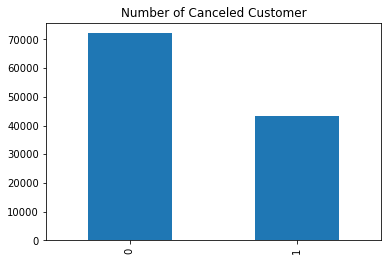

In [4]:
data['IsCanceled'].value_counts().plot(kind='bar', title='Number of Canceled Customer')

<AxesSubplot:title={'center':'Number of Canceled Customer'}>

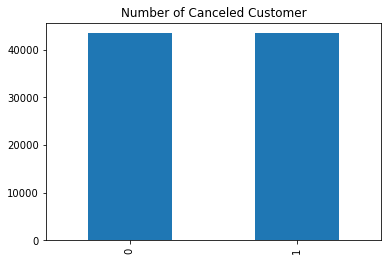

In [5]:
data_under['IsCanceled'].value_counts().plot(kind='bar', title='Number of Canceled Customer')

In [6]:
#x is all columns except for Loan Status
x = data.loc[:, data.columns != 'IsCanceled']

#y is just loan status
y = data["IsCanceled"]

#prepare by spliting test 20%
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2021)
print(y.value_counts())

#x is all columns except for Loan Status
x_under = data_under.loc[:, data_under.columns != 'IsCanceled']

#y is just loan status
y_under = data_under["IsCanceled"]

#prepare by spliting test 20%
x_under_train, x_under_test, y_under_train, y_under_test = model_selection.train_test_split(x_under, y_under, test_size = 0.2, random_state = 2021)
print(y_under.value_counts())
print(y_train.shape)

0    72121
1    43425
Name: IsCanceled, dtype: int64
0    43425
1    43425
Name: IsCanceled, dtype: int64
(92436,)


## Export Data

In [7]:
pickle.dump([x_under_train,x_under_test,y_under_train,y_under_test,x_train,x_test,y_train,y_test],open("2.out.x_y_train_test",'wb'))